In [1]:
# GHOST - Mesh Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from scipy import special
from math import floor, ceil
from Mesh import Mesh2D
from Discretization import SpatialDiscretization


# degree of discretization
p = [2]
Nd = len(p)

# 8 by 8 two-dimensional mesh
mesh = Mesh2D("test", "../mesh/square_mesh_x_5y_5.msh")
mesh.map_mesh(f_map=Mesh2D.grid_transformation())

# map of element index to discretization
element_to_discretization = [k % Nd for k in range(0,mesh.K)]

tau = [2*p[i] + 1 for i in range(0, Nd)]
mu = [2*p[i] +1 for i in range(0,Nd)]

# volume nodes and quadrature
volume_quadrature = [mp.XiaoGimbutasSimplexQuadrature(tau[i],2) for i in range(0,Nd)]
volume_nodes = [volume_quadrature[i].nodes for i in range(0,Nd)]
W = [np.diag(volume_quadrature[i].weights) for i in range(0,Nd)]

# facet nodes and quadrature (assume same everywhere)
facet_quadrature = [mp.LegendreGaussQuadrature(floor((mu[i]-1)/2)) for i in range(0,Nd)]
facet_nodes = [SpatialDiscretization.map_unit_to_facets(
    facet_quadrature[i].nodes,
    element_type="triangle") for i in range(0,Nd)]
W_gamma = [[np.diag(facet_quadrature[i].weights) for gamma in range(0,3)]
           for i in range(0,Nd)]

# build the discretization
discretization = SpatialDiscretization(mesh, element_to_discretization,
                                       p, volume_nodes, facet_nodes, W, W_gamma)

In [3]:
mesh.element_to_vertex

[[0, 1, 6],
 [6, 11, 10],
 [10, 11, 16],
 [16, 21, 20],
 [2, 7, 6],
 [6, 7, 12],
 [12, 17, 16],
 [16, 17, 22],
 [2, 3, 8],
 [8, 13, 12],
 [12, 13, 18],
 [18, 23, 22],
 [4, 9, 8],
 [8, 9, 14],
 [14, 19, 18],
 [18, 19, 24],
 [0, 6, 5],
 [5, 6, 10],
 [10, 16, 15],
 [15, 16, 20],
 [1, 2, 6],
 [6, 12, 11],
 [11, 12, 16],
 [16, 22, 21],
 [2, 8, 7],
 [7, 8, 12],
 [12, 18, 17],
 [17, 18, 22],
 [3, 4, 8],
 [8, 14, 13],
 [13, 14, 18],
 [18, 24, 23]]

In [4]:
mesh.local_to_vertex

[[(0, 1), (1, 6), (6, 0)],
 [(6, 11), (11, 10), (10, 6)],
 [(10, 11), (11, 16), (16, 10)],
 [(16, 21), (21, 20), (20, 16)],
 [(2, 7), (7, 6), (6, 2)],
 [(6, 7), (7, 12), (12, 6)],
 [(12, 17), (17, 16), (16, 12)],
 [(16, 17), (17, 22), (22, 16)],
 [(2, 3), (3, 8), (8, 2)],
 [(8, 13), (13, 12), (12, 8)],
 [(12, 13), (13, 18), (18, 12)],
 [(18, 23), (23, 22), (22, 18)],
 [(4, 9), (9, 8), (8, 4)],
 [(8, 9), (9, 14), (14, 8)],
 [(14, 19), (19, 18), (18, 14)],
 [(18, 19), (19, 24), (24, 18)],
 [(0, 6), (6, 5), (5, 0)],
 [(5, 6), (6, 10), (10, 5)],
 [(10, 16), (16, 15), (15, 10)],
 [(15, 16), (16, 20), (20, 15)],
 [(1, 2), (2, 6), (6, 1)],
 [(6, 12), (12, 11), (11, 6)],
 [(11, 12), (12, 16), (16, 11)],
 [(16, 22), (22, 21), (21, 16)],
 [(2, 8), (8, 7), (7, 2)],
 [(7, 8), (8, 12), (12, 7)],
 [(12, 18), (18, 17), (17, 12)],
 [(17, 18), (18, 22), (22, 17)],
 [(3, 4), (4, 8), (8, 3)],
 [(8, 14), (14, 13), (13, 8)],
 [(13, 14), (14, 18), (18, 13)],
 [(18, 24), (24, 23), (23, 18)]]

In [5]:
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,1.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.local_to_bc_index

{(0, 0): 3,
 (3, 1): 4,
 (8, 0): 3,
 (11, 1): 4,
 (12, 0): 2,
 (13, 1): 2,
 (14, 0): 2,
 (15, 1): 2,
 (16, 2): 1,
 (17, 2): 1,
 (18, 2): 1,
 (19, 2): 1,
 (20, 0): 3,
 (23, 1): 4,
 (28, 0): 3,
 (31, 1): 4}

In [6]:
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

In [7]:
mesh.local_to_local

{(0, 0): (3, 1),
 (0, 1): (20, 2),
 (0, 2): (16, 0),
 (1, 0): (21, 2),
 (1, 1): (2, 0),
 (1, 2): (17, 1),
 (2, 0): (1, 1),
 (2, 1): (22, 2),
 (2, 2): (18, 0),
 (3, 0): (23, 2),
 (3, 1): (0, 0),
 (3, 2): (19, 1),
 (4, 0): (24, 2),
 (4, 1): (5, 0),
 (4, 2): (20, 1),
 (5, 0): (4, 1),
 (5, 1): (25, 2),
 (5, 2): (21, 0),
 (6, 0): (26, 2),
 (6, 1): (7, 0),
 (6, 2): (22, 1),
 (7, 0): (6, 1),
 (7, 1): (27, 2),
 (7, 2): (23, 0),
 (8, 0): (11, 1),
 (8, 1): (28, 2),
 (8, 2): (24, 0),
 (9, 0): (29, 2),
 (9, 1): (10, 0),
 (9, 2): (25, 1),
 (10, 0): (9, 1),
 (10, 1): (30, 2),
 (10, 2): (26, 0),
 (11, 0): (31, 2),
 (11, 1): (8, 0),
 (11, 2): (27, 1),
 (12, 0): (16, 2),
 (12, 1): (13, 0),
 (12, 2): (28, 1),
 (13, 0): (12, 1),
 (13, 1): (17, 2),
 (13, 2): (29, 0),
 (14, 0): (18, 2),
 (14, 1): (15, 0),
 (14, 2): (30, 1),
 (15, 0): (14, 1),
 (15, 1): (19, 2),
 (15, 2): (31, 0),
 (16, 0): (0, 2),
 (16, 1): (17, 0),
 (16, 2): (12, 0),
 (17, 0): (16, 1),
 (17, 1): (1, 2),
 (17, 2): (13, 1),
 (18, 0): (2, 2)

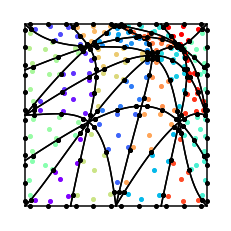

In [8]:
discretization.plot(markersize=4)